這份 Notebook 示範 PDF 解析的困難，以及示範用更厲害的 Llamaparse 來處理

In [ ]:
# from google.colab import userdata
# openai_api_key = userdata.get('openai_api_key')

In [1]:
import requests
import json
from pprint import pp

In [24]:
from dotenv import load_dotenv
import os

# Load the environment variables from .env file
load_dotenv()

# Access the API key
openai_api_key = os.getenv('OPENAI_API_KEY')
braintrust_api_key = os.getenv('BRAINTRUST_API_KEY')

In [3]:
def get_completion(messages, model="gpt-4.1-mini", temperature=0.2):
  payload = { "model": model, "temperature": temperature, "messages": messages }
  headers = { "Authorization": f'Bearer {openai_api_key}', "Content-Type": "application/json" }
  response = requests.post('https://api.openai.com/v1/chat/completions', headers = headers, data = json.dumps(payload) )
  obj = json.loads(response.text)
  if response.status_code == 200 :
    return obj["choices"][0]["message"]["content"]
  else :
    return obj["error"]

抓取範例 PDF 文件

In [4]:
!wget https://www.megabank.com.tw/-/media/mega/files/bank/personal/fund/bulletin/weekly-journal/market-analysis/113/1130513.pdf

--2025-07-07 16:56:45--  https://www.megabank.com.tw/-/media/mega/files/bank/personal/fund/bulletin/weekly-journal/market-analysis/113/1130513.pdf
Resolving www.megabank.com.tw (www.megabank.com.tw)... 23.49.116.35
Connecting to www.megabank.com.tw (www.megabank.com.tw)|23.49.116.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1798626 (1.7M) [application/pdf]
Saving to: ‘1130513.pdf’

1130513.pdf         100%[===================>]   1.71M  7.38MB/s    in 0.2s    

2025-07-07 16:56:46 (7.38 MB/s) - ‘1130513.pdf’ saved [1798626/1798626]



In [9]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 94.7 MB/s eta 0:00:00


In [5]:
filename = "1130513.pdf"

In [6]:
import fitz # PyMuPDF library
pages = fitz.open(filename)

In [8]:
context = pages[10].get_text()
print(context)

本資料純屬參考性質，兆豐商銀不作任何保證與承諾。上述資料，任何人因信賴此資料而做出或改變決策，本身須承擔一切風險，報告資料並無做出
買賣任何內文所涉及之證券建議、誘導及鼓勵相關交易。
11
殖利率彈升，流入債市資金有所停滯
•
流入債市資金有所停滯：因強勁的經濟數據和連續三個月超乎預期的通膨數據顯示物價壓力反彈，推遲了聯準會開始
降息的預期，美國公債殖利率近幾週飆升，流入投資級債的資金也有所下滑，但年初至今整體還是屬於資金淨流入，
而非投資級債也維持資金正流入的水準，顯示資金偏愛債券的趨勢未變。
•
投資級債殖利率彈升：投資級債仍具吸引力:(1)收益率較高:殖利率曾彈升至年初至今高點的5.8%，接近去年10月
6.5%的峰值; (2)聯準會今年仍會降息:聯準會排除升息可能性，表示今年仍會降息，只是幅度與時程尚有變數;(3)債券
供應下滑:4月份發債量僅為1,000億美金，與第一季的平均每月1,770億美金差距甚遠;(4)評等越來越高:A級以上的佔
總體投資級債的比例已達54%，雖然利率水準仍偏高，但投資級發債企業體質持續好轉，後續評等調升趨勢不變。
市
場
回
顧
市
場
焦
點
聚
焦
議
題
資
產
觀
點
投資級債的資金流入有所停滯
資料來源:JP Morgan, 2024.5.10
投資級債殖利率已反彈至今年新高
非投資級債的資金流入也為正流入
5.8%
5.0
5.1
5.2
5.3
5.4
5.5
5.6
5.7
5.8
Jan-24
Feb-24
Mar-24
Apr-24
May-24



### 就來挑戰這張投影片，可否能順利回答有四種投資策略呢?

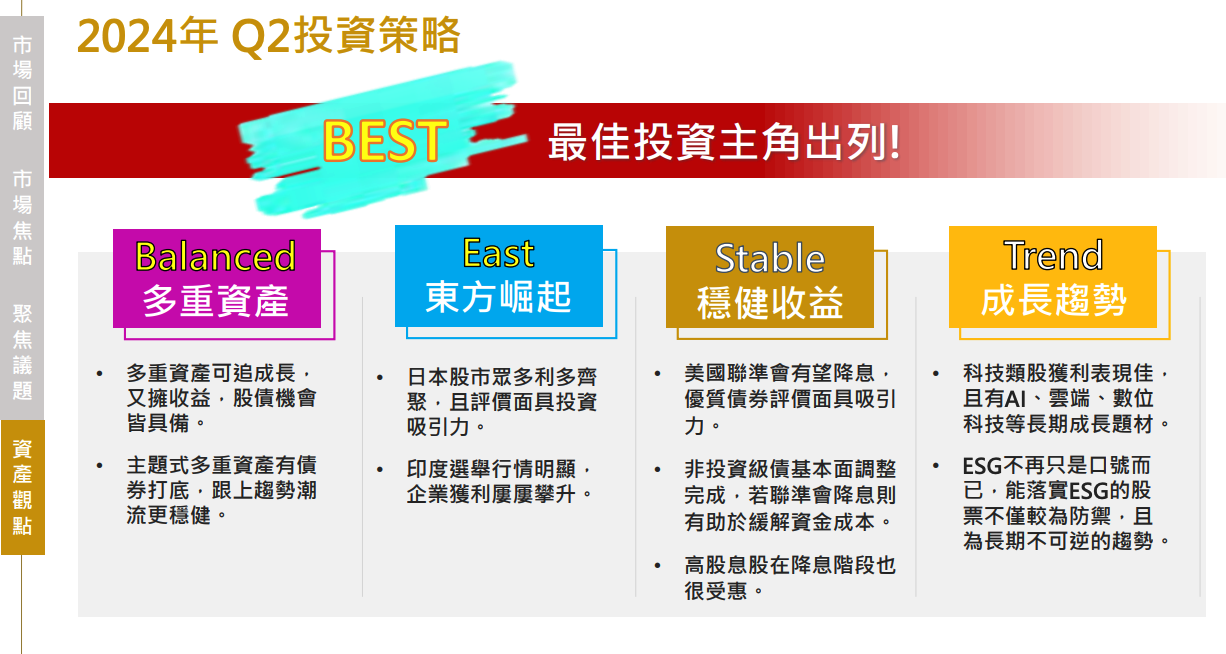

In [9]:
question = "請問2024 Q2的投資策略有哪幾種?"

prompt= f'''
Answer the question based on the context below,
and if the question can't be answered based on the context, say "I don't know"

Context:

{context}

Question: ```{question}```'''

result = get_completion([ {"role": "user", "content": prompt }])
print(result)

根據提供的資料內容，並未明確列出2024年第二季（Q2）的具體投資策略種類，因此無法直接回答「2024 Q2的投資策略有哪幾種？」這個問題。

回答：我不知道。


## 失敗，因為抓出來的文字根本沒有對齊，LLM 也無力回天~~

## 方法一: 用 Llamaparse 線上 API 服務

更好的處理表格和做OCR

* https://www.llamaindex.ai/blog/launching-the-first-genai-native-document-parsing-platform
* https://cloud.llamaindex.ai/parse



In [10]:
!pip install llama-parse

Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.8 MB/s eta 0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.2.3
    Uninstalling tenacity-8.2.3:
      Successfully uninstalled tenacity-8.2.3
  Attempting uninstall: setuptools
    Found existing installation: setuptools 78.1.0
    Uninstalling setuptools-78.1.0:
      Successfully uninstalled setuptools-78.1.0━━━━━━━━━━━━━━━━━━  3/17 [setuptools]
  Attempting uninstall: python-dotenv━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/17 [setuptools]
    Found existing installation: python-dotenv 1.0.0━━━━━━━━━━  3/17 [setuptools]
    Uninstalling python-dotenv-1.0.0:━━━━━━━━━━━━━━━━━━━━━━━━━  3/17 [setuptools]
      Successfu

In [11]:
import os  

from dotenv import load_dotenv
load_dotenv()

llamaindex_api_key = os.getenv('LLAMA_CLOUD_API_KEY')


In [ ]:
# llamaindex_api_key = userdata.get('llamaindex_api_key')

In [13]:
# Uncomment if you are in a Jupyter Notebook
import nest_asyncio
nest_asyncio.apply()

In [14]:
from llama_parse import LlamaParse  # pip install llama-parse

parser = LlamaParse(
    api_key=llamaindex_api_key,  # can also be set in your env as LLAMA_CLOUD_API_KEY
    result_type="markdown",  # "markdown" and "text" are available
    language="ch_tra" # TRADITIONAL_CHINESE
)

# sync
documents = parser.load_data(filename)

Started parsing the file under job_id 3f934443-1a2f-40ef-a39b-bd3f87fe486d
.

In [15]:
context2 = documents[15].text

In [16]:
print(context2)

市  2024年 Q2投資策略

# 回顧

# 最佳投資主角出列!

# 焦點

| 多重資產                     | 東方崛起                      | 穩健收益                     | 成⻑趨勢                             |
| ------------------------ | ------------------------- | ------------------------ | -------------------------------- |
| • 多重資產可追成⻑，又擁收益，股債機會皆具備。 | • 日本股市眾多利多齊聚，且評價面具投資吸引力。  | • 美國聯準會有望降息，優質債券評價面具吸引力。 | • 科技類股獲利表現佳，且有AI、雲端、數位科技等⻑期成⻑題材。 |
| 資產                       | • 主題式多重資產有債券打底，跟上趨勢潮流更穩健。 | • 印度選舉行情明顯，企業獲利屢屢攀升。     | • 非投資級債基本面調整完成，若聯準會降息則有助於緩解資金成本。 |
|                          | • 高股息股在降息階段也很受惠。          |                          |                                  |

本資料純屬參考性質，兆豐商銀不作任何保證與承諾。上述資料，任何人因信賴此資料而做出或改變決策，本身須承擔一切風險，報告資料並無做出買賣任何內文所涉及之證券建議、誘導及鼓勵相關交易。

16


In [17]:
question = "請問2024 Q2的投資策略有哪幾種?"

prompt= f'''
Answer the question based on the context below,
and if the question can't be answered based on the context, say "I don't know"

Context:

{context2}

Question: ```{question}```'''

result = get_completion([ {"role": "user", "content": prompt }])
print(result)

2024年Q2的投資策略有以下幾種：

1. 多重資產策略  
2. 東方崛起策略  
3. 穩健收益策略  
4. 成長趨勢策略


### 結果正確有四個部分!

再來挑戰一題完全是圖片的內容:

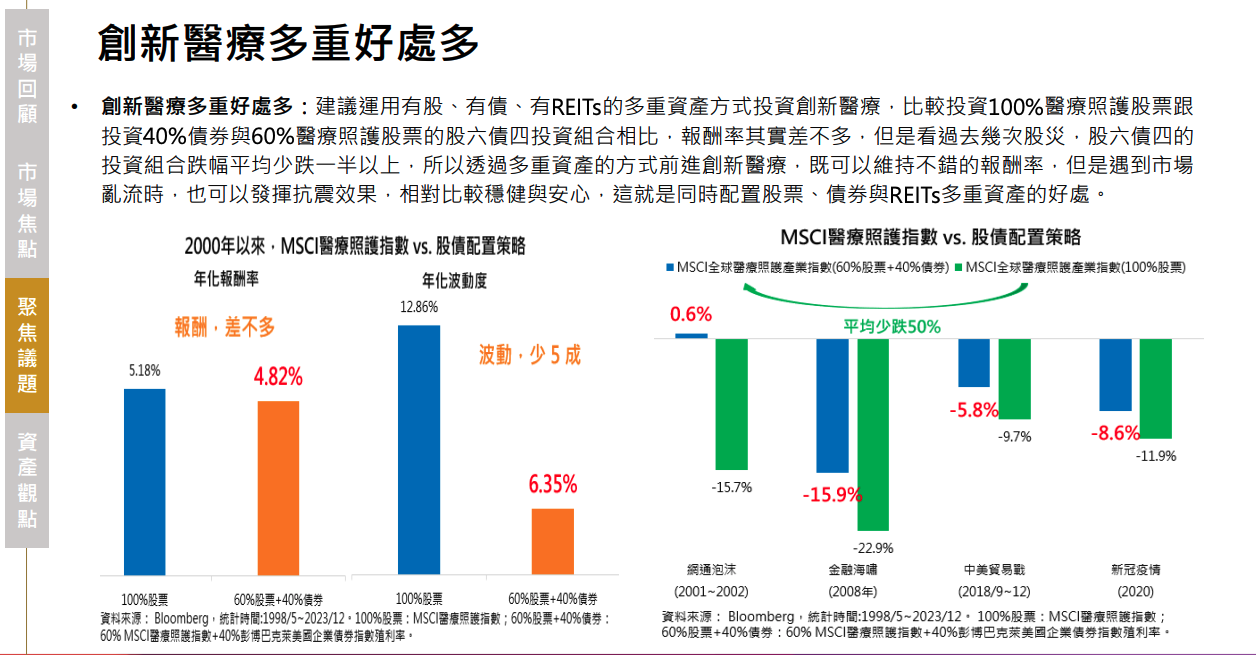

In [19]:
context3 = documents[14].text
print(context3)

市 創新醫療多重好處多
創新醫療多重好處多：建議運用有股、有債、有REITs的多重資產方式投資創新醫療，比較投資100%醫療照護股票跟投資40%債券與60%醫療照護股票的股六債四投資組合相比，報酬率其實差不多，但是看過去幾次股災，股六債四的投資組合跌幅平均少跌一半以上，所以透過多重資產的方式前進創新醫療，既可以維持不錯的報酬率，但是遇到市場亂流時，也可以發揮抗震效果，相對比較穩健與安心，這就是同時配置股票、債券與REITs多重資產的好處。

# 2000年以來

| 年化報酬率  | 年化波動度            |
| ------ | ---------------- |
| 報酬 差不多 | 12.86%           |
| 波動.少5成 | 0.6%             |
| 5.18%  | 4.82%            |
| 資      | -5.8% 9.7% -8.6% |
| 產      | 6.35%            |
| 觀      | -11.9%           |
| 點      | -15.7% -15.9%    |
|        | 22.9%            |

100%股票 50%股票+40%債券 100%脛票 60%脛票+40%債券 (2001~2002) (2008年) (2018/9~12) {2020)

資料末源 薪言時間:1998/5~2023/12 : 100%股票 50%脛票+40%債券 資料來源 紡言時間:1998/5~2023/12 100%脛票 50%脛票+40%債券

本資料純屬參考性質，兆豐商銀不作任何保證與承諾。上述資料，任何人因信賴此資料而做出或改變決策，本身須承擔一切風險，報告資料並無做出買賣任何內文所涉及之證券建議、誘導及鼓勵相關交易。




In [20]:
question = "請問 MSCI醫療照護指數 vs. 股債配置策略 的年化報酬率，分別是多少?"

prompt= f'''
Answer the question based on the context below,
and if the question can't be answered based on the context, say "I don't know"

Context:

{context3}

Question: ```{question}```'''

result = get_completion([ {"role": "user", "content": prompt }])
print(result)

根據提供的內容，MSCI醫療照護指數（100%股票）與股債配置策略（例如60%醫療照護股票 + 40%債券）的年化報酬率「報酬率其實差不多」，但具體數字未明確列出。

文中提到的數據片段中有「5.18%」與「4.82%」，推測可能分別代表兩種策略的年化報酬率，但無法完全確定哪個對應哪個策略。

因此，根據現有資訊，無法明確回答MSCI醫療照護指數與股債配置策略的年化報酬率分別是多少。

回答：I don't know


## 可使用 VLM 模型增強圖片解析!

In [21]:
parser = LlamaParse(
    api_key=llamaindex_api_key,  # can also be set in your env as LLAMA_CLOUD_API_KEY
    result_type="markdown",  # "markdown" and "text" are available
    language="ch_tra", # TRADITIONAL_CHINESE
    use_vendor_multimodal_model=True,
    vendor_multimodal_model_name="openai-gpt-4-1-mini", # 還支援 'anthropic-sonnet-3.5', 'openai-gpt-4o-mini'
    vendor_multimodal_api_key=openai_api_key
)

# sync
documents2 = parser.load_data(filename)

Started parsing the file under job_id 686114ef-2939-42b7-a16a-4bd1ec81ce31


In [22]:
context4 = documents2[14].text
print(context4)

市場回顧 市場焦點 聚焦議題 資產觀點

# 創新醫療多重好處多

- **創新醫療多重好處多**：建議運用有股、有債、有REITs的多重資產方式投資創新醫療，比較投資100%醫療照護股票跟投資40%債券與60%醫療照護股票的股六債四投資組合相比，報酬率其實差不多，但是看過去幾次股災，股六債四的投資組合跌幅平均少跌一半以上，所以透過多重資產的方式前進創新醫療，既可以維持不錯的報酬率，但是遇到市場亂流時，也可以發揮抗震效果，相對比較穩健與安心，這就是同時配置股票、債券與REITs多重資產的好處。

## 2000年以來，MSCI醫療照護指數 vs. 股債配置策略

| 年化報酬率 | 100%股票 | 60%股票+40%債券 |
|-------------|----------|------------------|
|             | 5.18%    | 4.82%            |

> 報酬，差不多

| 年化波動度 | 100%股票 | 60%股票+40%債券 |
|------------|----------|------------------|
|            | 12.86%   | 6.35%            |

> 波動，少5成

## MSCI醫療照護指數 vs. 股債配置策略

| 事件       | MSCI全球醫療照護產業指數(60%股票+40%債券) | MSCI全球醫療照護產業指數(100%股票) |
|------------|--------------------------------------------|------------------------------------|
| 網通泡沫 (2001~2002) | -15.7%                                    | 0.6%                               |
| 金融海嘯 (2008年)    | -22.9%                                    | -15.9%                             |
| 中美貿易戰 (2018/9~12) | -9.7%                        

In [23]:
question = "請問 MSCI醫療照護指數 vs. 股債配置策略 的年化報酬率，分別是多少?"

prompt= f'''
Answer the question based on the context below,
and if the question can't be answered based on the context, say "I don't know"

Context:

{context4}

Question: ```{question}```'''

result = get_completion([ {"role": "user", "content": prompt }])
print(result)

MSCI醫療照護指數（100%股票）的年化報酬率是5.18%，而股債配置策略（60%股票+40%債券）的年化報酬率是4.82%。


## 方法二: 用 LLM 自己做解析

1. 但是 ouput tokens 有上限喔，若文件太長得拆段做
2. 還可以做資料清理
3. 成本和準確率的衡量

In [4]:
!pip install openai

In [5]:
!pip install braintrust autoevals

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.0 MB/s eta 0:00:00


In [25]:
# braintrust_api_key = userdata.get('braintrust_api_key')

from braintrust import init_logger, traced, wrap_openai
from openai import OpenAI

logger = init_logger(project="RAG-multimodel-202504", api_key=braintrust_api_key)
client = wrap_openai(OpenAI(api_key=openai_api_key))

In [26]:
import base64

with open(filename, "rb") as f:
    data = f.read()

base64_string = base64.b64encode(data).decode("utf-8")

In [ ]:
messages = [
    { "role": "user", 
     "content": [
                {
                    "type": "file",
                    "file": {
                        "filename": "slides.pdf",
                        "file_data": f"data:application/pdf;base64,{base64_string}",
                    }
                },
                { "type": "text", 
                    "text": """Extract the text content from each slide of the PDF presentation document.
                    For each slide, enclose the content within page tags as follows:
                    <page_1>
                    [Content of slide 1]
                    </page_1>
                    <page_2>
                    [Content of slide 2]
                    </page_2>

                    For tables, please format them using markdown tables.
                    For charts or images, please provide detailed text descriptions.

                    Do not explain or interpret the content - extract exactly what appears on each slide.

                    Skip any investment disclaimers or warning statements (such as "本資料純屬參考性質,不作任何保證與承諾。上述資料,任何人因信賴此資料而做出或改變決策,本身須承擔一切風險,報告資料並無做出買賣任何內文所涉及之證券建議、誘導及鼓勵相關交易").

                    Make sure to process EVERY page in the document completely. Do not skip any page or content (except for the disclaimer statements mentioned above).""" }
            ] }
]

result = client.chat.completions.create(model="gpt-4.1-mini", messages=messages)

In [28]:
context5 = result.choices[0].message

In [29]:
context5

ChatCompletionMessage(content='<page_1>\n投資研究週報\n財富管理處 投顧小組\n113年5月13日\n淨零轉型 兆豐同行\n</page_1>\n<page_2>\n內容大綱\n\n1 市場回顧\n\n2 市場焦點\n\n3 聚焦議題\n\n4 資產觀點\n</page_2>\n<page_3>\n主要金融市場回顧\n資料來源:Bloomberg，2024.5.10投顧小組整理。\n\n全球主要股票指數(%)\n| 股票指數          | 週漲跌幅% | 過去1個月漲跌幅% | 過去1年漲跌幅% | 年初迄今漲跌幅% |\n|------------------|----------|-----------------|--------------|--------------|\n| MSCI AC世界指數     | 1.66%    | 1.20%           | 19.87%       | 7.57%        |\n| S&P 500指數       | 1.85%    | 1.20%           | 26.22%       | 9.49%        |\n| 歐洲道瓊600指數      | 3.01%    | 2.80%           | 12.32%       | 8.72%        |\n| MSCI亞太不含日本指數  | 1.15%    | 1.97%           | 7.44%        | 4.80%        |\n| 日經225指數         | -0.02%   | -3.42%          | 31.27%       | 14.24%       |\n| MSCI新興市場指數     | 0.96%    | 1.30%           | 9.39%        | 4.68%        |\n\n全球主要債券指數(%)\n| 債券市場           | 週漲跌幅% | 過去1個月漲跌幅% | 過去1年漲跌幅% | 年初迄今漲跌幅% |\n|------------------|---------|----------------|--------------|--------------

In [21]:
question = "請問 MSCI醫療照護指數 vs. 股債配置策略 的年化報酬率，分別是多少?"

prompt= f'''
Answer the question based on the context below,
and if the question can't be answered based on the context, say "I don't know"

Context:

{context5}

Question: ```{question}```'''

result = get_completion([ {"role": "user", "content": prompt }])
print(result)

根據提供的內容，MSCI醫療照護指數與股債配置策略的年化報酬率分別為：

- MSCI醫療照護指數（100%股票）：5.18%
- 股債配置策略（60%股票 + 40%債券）：4.82%


----

## 結論

1. 如果都是文字，用 pdf library 解析出文字即可
2. 如果都是文字，但有很多雜訊 -> 用 pdf library 解析出文字後，在用便宜的 LLM gpt-4o-mini 做濾掉雜訊
3. 如果是字在圖片上，用 OCR
4. 如果有表格，用 llamaparse 或 Unstructured.io 或 Docling, marker 等方案有針對表格最佳化
5. 如果有圖表，每頁轉成圖片丟給 Multimodal LLM 解析出文字, 這招也是萬用方案(只是成本?準確率?)